In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [94]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Crecimiento/conjunto_de_datos_gastoshogar_enigh2022_ns.csv'
df = pd.read_csv(file_path)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,folioviv,foliohog,clave,tipo_gasto,mes_dia,forma_pag1,forma_pag2,forma_pag3,lugar_comp,orga_inst,...,num_pagos,ultim_pago,gasto_tri,gasto_nm,gas_nm_tri,imujer_tri,entidad,est_dis,upm,factor
0,100005002,1,A004,G1,1109,1,0,0,5,0,...,,,308.57,,,,1,3,1,206
1,100005002,1,A015,G1,1113,1,0,0,6,0,...,,,745.71,,,,1,3,1,206
2,100005002,1,A019,G1,1113,1,0,0,6,0,...,,,411.42,,,,1,3,1,206
3,100005002,1,A052,G1,1113,1,0,0,6,0,...,,,617.14,,,,1,3,1,206
4,100005002,1,A075,G1,1110,1,0,0,4,0,...,,,269.99,,,,1,3,1,206


In [95]:
# VIVIENDAS POR TIPO DE GASTO
df['gasto_tri'] = pd.to_numeric(df['gasto_tri'], errors='coerce').astype(float)
df['gasto_tri_sum']=df.groupby('folioviv')['gasto_tri'].transform('sum')
df['tipo'] = df['clave'].str[0]
df_tipo=df.groupby(['folioviv','tipo']).agg({'gasto_tri':'sum'})
df_tipo

gasto_tri
folioviv   tipo           
100005002  A       9514.19
           C       2075.80
           D        673.53
           E       2903.22
           F       3919.34
...                    ...
3260797912 H        508.69
           J       1956.50
           K        391.30
           L       3913.04
           R       1810.00

[814479 rows x 1 columns]

In [98]:
# GASTO TRIMESTA (ME DÍ CUENTA QUE HAY QUE OMITIR Q Y T)
folioviv_list = df['folioviv'].unique().tolist()
df1=pd.DataFrame(folioviv_list,columns=['folioviv'])
df2=pd.DataFrame([df['folioviv'],df['gasto_tri_sum']])
df2=df2.transpose()
df3=pd.merge(df1,df2,on='folioviv',how='left')
df3=df3.drop_duplicates(subset=['folioviv'])
df3=df3[df3['gasto_tri_sum']!=0]
df3

,folioviv,gasto_tri_sum
0,100005002,32776.89
39,100005003,78670.73
73,100005004,101647.27
113,100012002,73630.16
191,100012004,51176.07
...,...,...
5074921,3260797907,35034.05
5074992,3260797908,13198.75
5075025,3260797909,18702.34
5075060,3260797910,117455.55


In [99]:
df3.describe()

,folioviv,gasto_tri_sum
count,8.875400e+04,8.875400e+04
mean,1.620262e+09,3.529078e+04
std,9.314011e+08,3.318532e+04
min,1.000050e+08,2.445000e+01
25%,8.046570e+08,1.720442e+04
50%,1.600914e+09,2.733110e+04
75%,2.403893e+09,4.278349e+04
max,3.260798e+09,1.663770e+06


In [101]:
# VIVIENDA POR TIPO DE GASTO SIN Q Y T
df_reset = df.reset_index()
df_pivot = df_reset.pivot_table(index='folioviv', columns='tipo', values='gasto_tri', aggfunc='sum')
df_pivot.fillna(0,inplace=True)
df_pivot.drop(['Q','T'],axis=1,inplace=True)
df4=df_pivot.copy()
df4['total']=df4.sum(axis=1)
df_pivot

tipo,A,B,C,D,E,F,G,H,I,J,K,L,M,N,R
folioviv,,,,,,,,,,,,,,,
100005002,9514.19,0.0,2075.80,673.53,2903.22,3919.34,0.00,2445.64,0.00,2641.29,0.0,0.00,0.00,3423.91,2276.75
100005003,17524.25,0.0,2816.11,3745.14,0.00,5806.44,26709.66,684.78,0.00,0.00,0.0,0.00,0.00,0.00,3965.00
100005004,18321.36,0.0,1422.55,1916.09,0.00,11612.90,2032.25,0.00,0.00,0.00,0.0,5380.43,0.00,45489.11,13150.00
100012002,27218.37,0.0,2020.58,4264.79,4209.66,26854.82,0.00,1369.56,97.82,0.00,0.0,0.00,0.00,244.56,7350.00
100012004,6351.40,0.0,3518.67,812.90,6967.74,19161.28,0.00,1751.06,0.00,1007.60,0.0,0.00,0.00,6505.42,5100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3260797907,13396.95,0.0,1219.32,1933.51,0.00,5806.45,3774.19,684.77,684.78,1090.75,4891.3,0.00,538.03,0.00,1014.00
3260797908,7071.35,0.0,1483.51,714.17,0.00,2903.22,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,1026.50
3260797909,6325.68,0.0,3028.03,1643.18,0.00,1451.61,3483.87,1036.95,0.00,0.00,0.0,0.00,831.52,0.00,901.50


In [102]:
df4

tipo,A,B,C,D,E,F,G,H,I,J,K,L,M,N,R,total
folioviv,,,,,,,,,,,,,,,,
100005002,9514.19,0.0,2075.80,673.53,2903.22,3919.34,0.00,2445.64,0.00,2641.29,0.0,0.00,0.00,3423.91,2276.75,29873.67
100005003,17524.25,0.0,2816.11,3745.14,0.00,5806.44,26709.66,684.78,0.00,0.00,0.0,0.00,0.00,0.00,3965.00,61251.38
100005004,18321.36,0.0,1422.55,1916.09,0.00,11612.90,2032.25,0.00,0.00,0.00,0.0,5380.43,0.00,45489.11,13150.00,99324.69
100012002,27218.37,0.0,2020.58,4264.79,4209.66,26854.82,0.00,1369.56,97.82,0.00,0.0,0.00,0.00,244.56,7350.00,73630.16
100012004,6351.40,0.0,3518.67,812.90,6967.74,19161.28,0.00,1751.06,0.00,1007.60,0.0,0.00,0.00,6505.42,5100.00,51176.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3260797907,13396.95,0.0,1219.32,1933.51,0.00,5806.45,3774.19,684.77,684.78,1090.75,4891.3,0.00,538.03,0.00,1014.00,35034.05
3260797908,7071.35,0.0,1483.51,714.17,0.00,2903.22,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,1026.50,13198.75
3260797909,6325.68,0.0,3028.03,1643.18,0.00,1451.61,3483.87,1036.95,0.00,0.00,0.0,0.00,831.52,0.00,901.50,18702.34


In [103]:
# APLICACIÓN DE ANÁLISIS POR COMPONENTES PRINCIPALES

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# ESTANDARIZACIÓN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_pivot)

# PCA
pca = PCA()
pca.fit(X_scaled)

print("Eigenvalores (autovalores):", pca.explained_variance_)
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)
print("Componentes principales (autovectores):\n", pca.components_)


Eigenvalores (autovalores): [3.59330559 1.07771117 1.03372786 1.00009361 0.94215106 0.92471398
 0.90589438 0.86809713 0.8394844  0.82592787 0.73083637 0.66548975
 0.57647704 0.53900877 0.4772499 ]
Varianza explicada por cada componente: [0.23955101 0.0718466  0.06891441 0.06667216 0.06280936 0.0616469
 0.06039228 0.05787249 0.055965   0.05506124 0.04872188 0.04436548
 0.03843137 0.03593351 0.0318163 ]
Componentes principales (autovectores):
 [[ 3.65621143e-01 -1.81651446e-03  3.40565315e-01  3.76701504e-01
   2.48223274e-01  3.37335989e-01  1.60632159e-01  3.55560513e-01
   1.57945533e-01  1.35647129e-01  1.25511449e-01  1.92148072e-01
   1.48259066e-01  2.33302432e-01  3.29182434e-01]
 [-6.17948327e-02  3.54457328e-02 -1.82837777e-01 -1.13171522e-01
  -4.19832389e-02 -1.48401198e-01 -2.64846048e-01  1.49048097e-01
   5.60159564e-01 -4.07345686e-02  4.94467088e-01  4.37246771e-01
   5.59341068e-02  1.08115119e-01 -2.58080016e-01]
 [-1.39064051e-01 -1.34389909e-01  7.86923617e-03 -1.221

In [104]:
#OBTENCIÓN DE LOS SCORES POR HOGAR (COMBINACIÓN LINEAL DEL PRIMER EIGENVETOR POR LAS OBSERVACIONES DE TIPO DE GASTO)
scores = pca.transform(X_scaled)
indice_pobreza = scores[:, 0]
print(indice_pobreza)

[-0.22491892  1.16046152  3.82324362 ... -0.82766308  1.78480813
  0.30556514]


In [105]:
# DATAFRAME DE LAS OBSERVACIONES ESTANDARIZADAS
df_scaled = pd.DataFrame(X_scaled, columns=df_pivot.columns)
df_scaled

tipo,A,B,C,D,E,F,G,H,I,J,K,L,M,N,R
0,-0.419381,-0.040624,0.106786,-0.680192,0.686328,0.049262,-0.405551,0.225999,-0.159798,0.237358,-0.180314,-0.184174,-0.154886,0.291738,-0.145895
1,0.294813,-0.040624,0.366193,0.630655,-0.257784,0.422137,5.014683,-0.357034,-0.159798,-0.225814,-0.180314,-0.184174,-0.154886,-0.241787,0.384569
2,0.365886,-0.040624,-0.122115,-0.149914,-0.257784,1.569443,0.006857,-0.583769,-0.159798,-0.225814,-0.180314,4.975443,-0.154886,6.846483,3.270586
3,1.159162,-0.040624,0.087437,0.852422,1.111176,4.581116,-0.405551,-0.130298,-0.089347,-0.225814,-0.180314,-0.184174,-0.154886,-0.203679,1.448170
4,-0.701382,-0.040624,0.612372,-0.620714,2.008089,3.060939,-0.405551,-0.003981,-0.159798,-0.049123,-0.180314,-0.184174,-0.154886,0.771910,0.741198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88818,-0.073185,-0.040624,-0.193327,-0.142480,-0.257784,0.422139,0.360351,-0.357037,0.333385,-0.034542,0.876786,-0.184174,-0.101017,-0.241787,-0.542664
88819,-0.637189,-0.040624,-0.100754,-0.662849,-0.257784,-0.151515,-0.405551,-0.583769,-0.159798,-0.225814,-0.180314,-0.184174,-0.154886,-0.241787,-0.538736
88820,-0.703675,-0.040624,0.440450,-0.266382,-0.257784,-0.438340,0.301436,-0.240428,-0.159798,-0.225814,-0.180314,-0.184174,-0.071632,-0.241787,-0.578012
88821,4.021647,-0.040624,1.317369,-0.781783,-0.257784,2.143095,-0.405551,-0.583769,-0.159798,-0.088578,-0.180314,-0.184174,-0.154886,-0.241787,-0.156186


In [106]:
# INCORPORACIÓN DE LOS ÍNDICES DE POBREZA
df_scaled['indice_pobreza'] = indice_pobreza
df_scaled

tipo,A,B,C,D,E,F,G,H,I,J,K,L,M,N,R,indice_pobreza
0,-0.419381,-0.040624,0.106786,-0.680192,0.686328,0.049262,-0.405551,0.225999,-0.159798,0.237358,-0.180314,-0.184174,-0.154886,0.291738,-0.145895,-0.224919
1,0.294813,-0.040624,0.366193,0.630655,-0.257784,0.422137,5.014683,-0.357034,-0.159798,-0.225814,-0.180314,-0.184174,-0.154886,-0.241787,0.384569,1.160462
2,0.365886,-0.040624,-0.122115,-0.149914,-0.257784,1.569443,0.006857,-0.583769,-0.159798,-0.225814,-0.180314,4.975443,-0.154886,6.846483,3.270586,3.823244
3,1.159162,-0.040624,0.087437,0.852422,1.111176,4.581116,-0.405551,-0.130298,-0.089347,-0.225814,-0.180314,-0.184174,-0.154886,-0.203679,1.448170,2.787963
4,-0.701382,-0.040624,0.612372,-0.620714,2.008089,3.060939,-0.405551,-0.003981,-0.159798,-0.049123,-0.180314,-0.184174,-0.154886,0.771910,0.741198,1.494013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88818,-0.073185,-0.040624,-0.193327,-0.142480,-0.257784,0.422139,0.360351,-0.357037,0.333385,-0.034542,0.876786,-0.184174,-0.101017,-0.241787,-0.542664,-0.264240
88819,-0.637189,-0.040624,-0.100754,-0.662849,-0.257784,-0.151515,-0.405551,-0.583769,-0.159798,-0.225814,-0.180314,-0.184174,-0.154886,-0.241787,-0.538736,-1.275321
88820,-0.703675,-0.040624,0.440450,-0.266382,-0.257784,-0.438340,0.301436,-0.240428,-0.159798,-0.225814,-0.180314,-0.184174,-0.071632,-0.241787,-0.578012,-0.827663
88821,4.021647,-0.040624,1.317369,-0.781783,-0.257784,2.143095,-0.405551,-0.583769,-0.159798,-0.088578,-0.180314,-0.184174,-0.154886,-0.241787,-0.156186,1.784808


In [110]:
#ÍNDICE DE PROBREZA POR ACP
df_pobreza = df_scaled[['indice_pobreza']].copy()
df_pobreza

tipo,indice_pobreza
0,-0.224919
1,1.160462
2,3.823244
3,2.787963
4,1.494013
...,...
88818,-0.264240
88819,-1.275321
88820,-0.827663
88821,1.784808


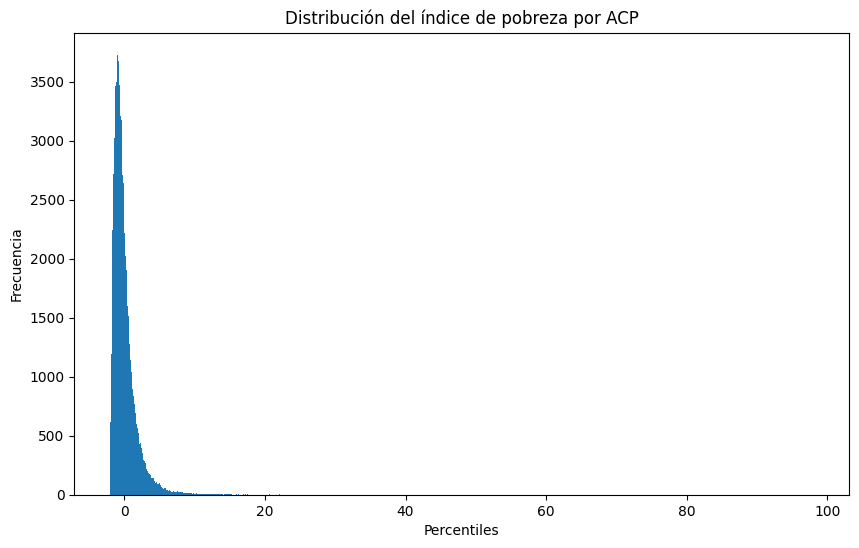

In [112]:
# DISTRIBUCIÓN DEL ÍNDICE DE POBREZA POR ACP
plt.figure(figsize=(10,6))
title='Distribución del índice de pobreza por ACP'
plt.title(title)
plt.xlabel('Percentiles')
plt.ylabel('Frecuencia')
plt.hist(df_pobreza['indice_pobreza'],bins=1000)
plt.show()

In [115]:
#AHORA SE REALIZARÁ UNA PRUEBA DE UMBRAL CON LA LÍNEA DE POBREZA DEFINIDA
# SE OBTENDRÁ EL ÍNDICE DE POBREZA RELACIONADO A LAS OBSERVACIONES DE TIPO DE GASTO ESPECIFICADAS
medias = df_pivot.mean()
desv_std = df_pivot.std()
tipo_gasto = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','R']
gasto =[3060,2700,124,386.6,59,0,0,660,0,117,0,0,0,540,607.735]
linea =pd.DataFrame({'tipo_gasto':tipo_gasto,'gasto':gasto})
linea['media'] = medias.values
linea['desv_std'] = desv_std.values
linea['estandarizada']=(linea['gasto']-linea['media'])/linea['desv_std']
linea

,tipo_gasto,gasto,media,desv_std,estandarizada
0,A,3060.000,14217.762610,11215.585527,-0.994844
1,B,2700.000,3.129802,77.043517,35.004505
2,C,124.000,1771.048199,2853.871892,-0.577128
3,D,386.600,2267.373335,2343.238238,-0.802639
4,E,59.000,792.707000,3075.095982,-0.238596
5,F,0.000,3670.027297,5060.977070,-0.725162
6,G,0.000,1998.461697,4927.796056,-0.405549
7,H,660.000,1763.083721,3020.190548,-0.365236
8,I,0.000,221.877939,1388.500860,-0.159797
9,J,117.000,1287.727656,5702.643284,-0.205296


In [116]:
# SCORE OBTENIDO
score_lp = np.dot(linea['estandarizada'], pca.components_[0])
score_lp

np.float64(-1.8165865648441724)

In [117]:
# HOGARES POR DEBAJO DEL UMBRAL (NO PARECE SER SIGNIFICATIVO O BIEN LA LÍNEA DE POBREZA PROPUESTA NO ES LA CORRECTA PARA ESTE TIPO DE ANÁLISIS, NO OBSTANTE SE RESCATA LA INTERPRETACIÓN DE LOS RESULTADOS OBTENIDOS POR ACP)
poverty_households_1=df_pobreza[df_pobreza['indice_pobreza']<score_lp].shape[0]
poverty_households_1

1799

In [118]:
# CÁLCULO DE LAS MEDIDAS FGT0,1,2
poverty_line = 24763.005
#CONTRIBUCIÓN DE CADA OBSERVACIÓN PARA EL CÁLCULO DE LAS MEDIDAS
df4['FGT0'] = (df4['total'] < poverty_line).astype(int)
df4['FGT1'] = np.where(df4['total'] < poverty_line,
                       (poverty_line - df4['total']) / poverty_line,
                       0)
df4['FGT2'] = np.where(df4['total'] < poverty_line,
                       ((poverty_line - df4['total']) / poverty_line) ** 2,
                       0)

In [119]:
df4

tipo,A,B,C,D,E,F,G,H,I,J,K,L,M,N,R,total,FGT0,FGT1,FGT2
folioviv,,,,,,,,,,,,,,,,,,,
100005002,9514.19,0.0,2075.80,673.53,2903.22,3919.34,0.00,2445.64,0.00,2641.29,0.0,0.00,0.00,3423.91,2276.75,29873.67,0,0.000000,0.000000
100005003,17524.25,0.0,2816.11,3745.14,0.00,5806.44,26709.66,684.78,0.00,0.00,0.0,0.00,0.00,0.00,3965.00,61251.38,0,0.000000,0.000000
100005004,18321.36,0.0,1422.55,1916.09,0.00,11612.90,2032.25,0.00,0.00,0.00,0.0,5380.43,0.00,45489.11,13150.00,99324.69,0,0.000000,0.000000
100012002,27218.37,0.0,2020.58,4264.79,4209.66,26854.82,0.00,1369.56,97.82,0.00,0.0,0.00,0.00,244.56,7350.00,73630.16,0,0.000000,0.000000
100012004,6351.40,0.0,3518.67,812.90,6967.74,19161.28,0.00,1751.06,0.00,1007.60,0.0,0.00,0.00,6505.42,5100.00,51176.07,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3260797907,13396.95,0.0,1219.32,1933.51,0.00,5806.45,3774.19,684.77,684.78,1090.75,4891.3,0.00,538.03,0.00,1014.00,35034.05,0,0.000000,0.000000
3260797908,7071.35,0.0,1483.51,714.17,0.00,2903.22,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,1026.50,13198.75,1,0.466997,0.218086
3260797909,6325.68,0.0,3028.03,1643.18,0.00,1451.61,3483.87,1036.95,0.00,0.00,0.0,0.00,831.52,0.00,901.50,18702.34,1,0.244747,0.059901


In [120]:
overall_FGT0 = df4['FGT0'].mean()
overall_FGT1 = df4['FGT1'].mean()
overall_FGT2 = df4['FGT2'].mean()

print("FGT0:", overall_FGT0)
print("FGT1:", overall_FGT1)
print("FGT2:", overall_FGT2)


FGT0: 0.4472377649933013
FGT1: 0.16737884548468906
FGT2: 0.08740075659916012
